## Analysis of Airbnb accommodations in the city of New York

This project will examine a dataset of apartments advertised on the Airbnb platform in this American city. In this way, it will analyse the impact of Airbnb on the housing market in a city as touristic as New York, as well as the city's rental patterns, prices, safety and tourist flows.

This analysis will allow us to understand the impact of this platform and to formulate possible regulations to address the problems associated with it.

### Inside Airbnb: New York, USA -> https://insideairbnb.com/get-the-data/

#### Files:

- ``listings.csv.gz`` - Detailed Listings data
- ``calendar.csv.gz`` - Detailed Calendar Data
- ``reviews.csv.gz`` - Detailed Review Data
- ``listings.csv`` - Summary information and metrics for listings in Rome (good for visualisations).
- ``reviews.csv`` - Summary Review data and Listing ID (to facilitate time based analytics and visualisations linked to a listing).
- ``neighbourhoods.csv`` - Neighbourhood list for geo filter. Sourced from city or open source GIS files.
- ``neighbourhoods.geojson`` - GeoJSON file of neighbourhoods of the city.

### NYC Open Data -> https://opendata.cityofnewyork.us/

<img src='https://www.nyc.gov/assets/operations/images/content/researchandanalytics/programs_OpenData.png' width="250" height="250" />

- ``NYPD.csv`` - This [dataset](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243/data) includes all felonies, misdemeanors, and violations reported to the New York City Police Department (NYPD).

<br>

## Table of content

1. [Import libraries and download datasets](#1-import-libraries-and-download-datasets)
   - [Import libraries](#import-libraries)
   - [Download datasets](#download-datasets)
2. [Reading and visualization the information of the different datasets](#2-reading-and-visualization-the-information-of-the-different-datasets)
   - [Import datasets](#import-datasets)
   - [Visualization of the datasets](#visualization-of-the-datasets)
3. [Preprocessing](#4-preprocessing)
   - [Listings dataset](#listings-dataset)
     - [Treatment of null values](#treatment-of-null-values)
     - [Column procesing](#column-procesing)
   - [Calendar & Reviews](#calendar-reviews)
     - [Treatment of null values](#treatment-of-null-values)
   - [Safety dataset](#safety-dataset)
     - [Column procesing](#column-procesing)
4. [Exploratory analysis (EDA)](#5-exploratory-analysis-eda)
   - [Neighbourhood analysis](#neighbourhood-analysis)
   - [Room and property types](#room-and-property-types)
     - [Room types](#room-types)
     - [Property types](#property-types)
     - [Number of guests](#number-of-guests)
   - [Average prices](#Average-prices)
     - [Average price per district](#Average-price-per-district)
     - [Average price per neighbourhood](#Average-price-per-neighbourhood)
   - [Neighbourhood safety](#neighbourhood-safety)
   - [Reviews, ratings and host responses](#Reviews-ratings-and-host-responses)
     - [Neighborhoods with higher scores](#neighborhoods-with-higher-scores)
     - [Super host](#super-host)
     - [Host response](#host-response)
   - [Availability over time](#availability-over-time)

---
## Import libraries and download datasets

### Import libraries

In [1]:
# Data Libraries
import wget
import os
import urllib.request
import shutil
import gzip
import pandas as pd
import numpy as np
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Interactive Maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

# Graphics and Images
import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

### Download datasets

In [1]:
'''# We create a folder to contain our dataset, ensuring that it has not already been created.
if not os.path.isdir('insideairbnb/'): os.mkdir('insideairbnb/')

# Download the files from the website
wget.download('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/data/listings.csv.gz')
wget.download('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/data/reviews.csv.gz')
wget.download('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/data/calendar.csv.gz')
wget.download('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/visualisations/neighbourhoods.geojson')

# Create the dataframes from compressed files
listings = pd.read_csv('insideairbnb/listings.csv.gz', compression='gzip')
reviews = pd.read_csv('insideairbnb/reviews.csv.gz', compression='gzip')
calendar = pd.read_csv('insideairbnb/calendar.csv.gz', compression='gzip')'''

"# We create a folder to contain our dataset, ensuring that it has not already been created.\nif not os.path.isdir('insideairbnb/'): os.mkdir('insideairbnb/')\n\n# Download the files from the website\nwget.download('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/data/listings.csv.gz')\nwget.download('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/data/reviews.csv.gz')\nwget.download('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/data/calendar.csv.gz')\n\n# Create the dataframes from compressed files\nlistings = pd.read_csv('insideairbnb/listings.csv.gz', compression='gzip')\nreviews = pd.read_csv('insideairbnb/reviews.csv.gz', compression='gzip')\ncalendar = pd.read_csv('insideairbnb/calendar.csv.gz', compression='gzip')"

## Reading and visualization of the different datasets

### Import datasets

In [2]:
# Once we have the airbnb files downloaded, create the dataframes using this code.
listings = pd.read_csv('insideairbnb/listings.csv')
reviews = pd.read_csv('insideairbnb/reviews.csv')
calendar = pd.read_csv('insideairbnb/calendar.csv')

# Do the same with the public safety dataset
safety = pd.read_csv("insideairbnb/NYPD.csv")

C:\Users\marct\AppData\Local\Temp\ipykernel_14664\2986769797.py:2: DtypeWarning:

Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.



### Visualization of the datasets

In [3]:
# Listings dataset
listings.head()

id                         listing_url       scrape_id last_scraped  \
0   2539   https://www.airbnb.com/rooms/2539  20220907064715   2022-09-07   
1   2595   https://www.airbnb.com/rooms/2595  20220907064715   2022-09-07   
2   5121   https://www.airbnb.com/rooms/5121  20220907064715   2022-09-07   
3  45910  https://www.airbnb.com/rooms/45910  20220907064715   2022-09-07   
4   5136   https://www.airbnb.com/rooms/5136  20220907064715   2022-09-07   

        source                                      name  \
0  city scrape        Clean & quiet apt home by the park   
1  city scrape                     Skylit Midtown Castle   
2  city scrape                           BlissArtsSpace!   
3  city scrape        Beautiful Queens Brownstone! - 5BR   
4  city scrape  Spacious Brooklyn Duplex, Patio + Garden   

                                         description  \
0  Renovated apt home in elevator building.<br />...   
1  Beautiful, spacious skylit studio in the heart...   
2  One room available for rent in a 2 bedroom apt...   
3  <b>The space</b><br />Beautiful, fully furnish...   
4  We welcome you to stay in our lovely 2 br dupl...   

                               neighborhood_overview  \
0    Close to Prospect Park and Historic Ditmas Park   
1  Centrally located in the heart of Manhattan ju...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/3949d073-a02e...     2787  ...   
1  https://a0.muscache.com/pictures/f0813a11-40b2...     2845  ...   
2  https://a0.muscache.com/pictures/2090980c-b68e...     7356  ...   
3  https://a0.muscache.com/pictures/27117627/19ff...   204539  ...   
4  https://a0.muscache.com/pictures/miso/Hosting-...     7378  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        5.00                   4.75                4.88   
1                        4.80                   4.81                4.40   
2                        4.91                   4.47                4.52   
3                        5.00                   4.82                4.55   
4                        5.00                   4.67                5.00   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              9   
1     NaN                f                              3   
2     NaN                f                              2   
3     NaN                f                              6   
4     NaN                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           3   
2                                           0   
3                                           6   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            6   
1                                            0   
2                                            2   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           2              0.11  
1                                           0              0.31  
2                                           0              0.31  
3                                           0              0.10  
4                                           0              0.03  

[5 rows x 75 columns]

In [4]:
# Let's view the columns and row names of the main dataset
print('Cantidad de Filas y columnas:', listings.shape)
print('Nombre columnas:', listings.columns)

Cantidad de Filas y columnas: (39881, 75)
Nombre columnas: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'mi

In [5]:
# Observe the dataframe
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            39881 non-null  int64  
 1   listing_url                                   39881 non-null  object 
 2   scrape_id                                     39881 non-null  int64  
 3   last_scraped                                  39881 non-null  object 
 4   source                                        39881 non-null  object 
 5   name                                          39868 non-null  object 
 6   description                                   39036 non-null  object 
 7   neighborhood_overview                         23466 non-null  object 
 8   picture_url                                   39881 non-null  object 
 9   host_id                                       39881 non-null 

In [6]:
# Calendar dataset
calendar.head()

listing_id        date available    price adjusted_price  minimum_nights  \
0        2539  2022-09-07         f  $299.00        $299.00            30.0   
1        2539  2022-09-08         f  $299.00        $299.00            30.0   
2        2539  2022-09-09         f  $299.00        $299.00            30.0   
3        2539  2022-09-10         f  $299.00        $299.00            30.0   
4        2539  2022-09-11         f  $299.00        $299.00            30.0   

   maximum_nights  
0           730.0  
1           730.0  
2           730.0  
3           730.0  
4           730.0

In [7]:
# Show columns and rows of Calendar dataset
print('Cantidad de Filas y columnas:',calendar.shape)
print('Nombre columnas:',calendar.columns)

Cantidad de Filas y columnas: (14551462, 7)
Nombre columnas: Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')


In [8]:
# Reviews dataset
reviews.head()

listing_id         id        date  reviewer_id reviewer_name  \
0        2539   55688172  2015-12-04     25160947         Peter   
1        2539   97474898  2016-08-27     91513326           Liz   
2        2539  105340344  2016-10-01     90022459       Евгений   
3        2539  133131670  2017-02-20    116165195        George   
4        2539  138349776  2017-03-19    118432644        Carlos   

                                            comments  
0                                        Great host   
1  Nice room for the price. Great neighborhood. J...  
2                     Very nice apt.  New remodeled.  
3  Great place to stay for a while. John is a gre...  
4                                                  .

In [9]:
# Show columns and rows of Reviews dataset
print('Cantidad de Filas y columnas:',reviews.shape)
print('Nombre columnas:',reviews.columns)

Cantidad de Filas y columnas: (1064458, 6)
Nombre columnas: Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


In [10]:
# Safety dataset
safety.head()

CMPLNT_NUM  ADDR_PCT_CD        BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM  \
0  247853895         43.0          BRONX   07/11/2022     09:09:00   
1  250722124         67.0       BROOKLYN   01/01/2021     12:00:00   
2  239511545        120.0  STATEN ISLAND   12/24/2021     08:00:00   
3  247992275        115.0         QUEENS   06/15/2015     00:01:00   
4  239602232         75.0       BROOKLYN   01/01/2018     09:00:00   

  CMPLNT_TO_DT CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  ...  \
0          NaN       (null)        COMPLETED     (null)          NaN  ...   
1   09/07/2022     12:00:00        COMPLETED     (null)          NaN  ...   
2   01/03/2022     08:00:00        COMPLETED     (null)          NaN  ...   
3   07/13/2022     17:00:00        COMPLETED     (null)          NaN  ...   
4   04/14/2021     23:59:00        COMPLETED     (null)          NaN  ...   

   TRANSIT_DISTRICT VIC_AGE_GROUP                  VIC_RACE VIC_SEX  \
0               NaN       UNKNOWN                   UNKNOWN       D   
1               NaN           <18                     BLACK       F   
2               NaN         18-24  ASIAN / PACIFIC ISLANDER       M   
3               NaN         45-64                     WHITE       M   
4               NaN           65+                     BLACK       M   

  X_COORD_CD Y_COORD_CD   Latitude  Longitude  \
0  1022682.0   242998.0  40.833567 -73.861118   
1   997843.0   175671.0  40.648851 -73.951017   
2   960911.0   165085.0  40.619768 -74.084070   
3  1013677.0   212463.0  40.749791 -73.893792   
4  1022153.0   184000.0  40.671636 -73.863359   

                                Lat_Lon  \
0               (40.833567, -73.861118)   
1  (40.6488507469884, -73.951016510623)   
2                (40.619768, -74.08407)   
3               (40.749791, -73.893792)   
4               (40.671636, -73.863359)   

                    New Georeferenced Column  
0               POINT (-73.861118 40.833567)  
1  POINT (-73.951016510623 40.6488507469884)  
2                POINT (-74.08407 40.619768)  
3               POINT (-73.893792 40.749791)  
4               POINT (-73.863359 40.671636)  

[5 rows x 36 columns]

In [11]:
# Show columns of Safety dataset
safety.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')

[Here](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243) we can find column's information.

## Preprocessing

### Listings dataset


#### Treatment of null values

<AxesSubplot: >

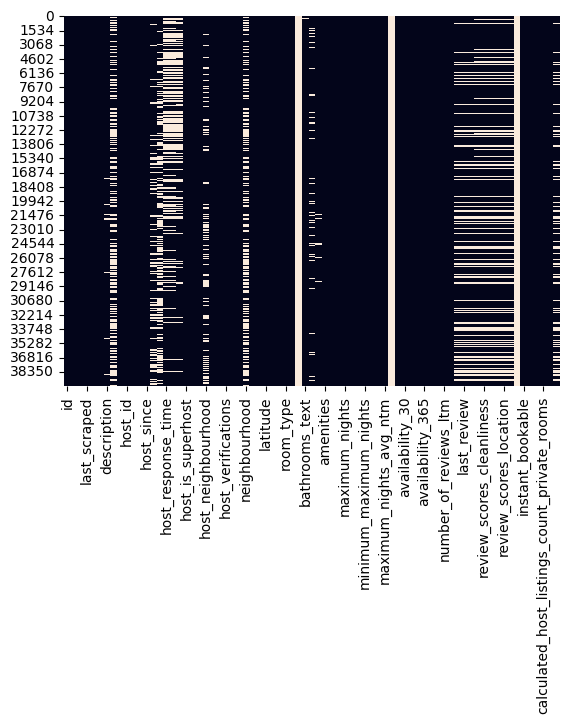

In [12]:
# See the nulls with a heatmap graph
sns.heatmap(listings.isnull(), cbar=False)

In [52]:
# See the nulls again in another way
missing_values = listings.isnull().sum()
missing_values = missing_values.to_frame().rename(columns = {0:'nulos'})
missing_values['porcentaje'] = listings.isnull().sum()*100/listings.shape[0]
missing_values = missing_values.sort_values(by = ['nulos'], ascending = False)
missing_values[missing_values['porcentaje'] > 20]

nulos  porcentaje
bathrooms                    39881      100.00
calendar_updated             39881      100.00
license                      39876       99.99
host_about                   17372       43.56
neighborhood_overview        16415       41.16
neighbourhood                16414       41.16
host_response_time           13548       33.97
host_response_rate           13548       33.97
host_acceptance_rate         11861       29.74
review_scores_value           8832       22.15
review_scores_location        8832       22.15
review_scores_checkin         8829       22.14
review_scores_accuracy        8825       22.13
review_scores_communication   8820       22.12
review_scores_cleanliness     8815       22.10
reviews_per_month             8362       20.97
first_review                  8362       20.97
last_review                   8362       20.97
review_scores_rating          8362       20.97
host_neighbourhood            8231       20.64

In [53]:
# Delete all the columns with almost 100% of null values
listings = listings.drop(['bathrooms', 'calendar_updated', 'license'], axis=1)

In [54]:
# Create a function to repair the null values replacing them with the mean or median according to the data type of their column

def rellenar (dataframe, columnas):
    for columna in columnas:
        if(dataframe[columna].dtype == 'float64' or dataframe[columna].dtype == 'int64'):
            numero = dataframe[columna].mean()
        else:
            numero = dataframe[columna].mode()[0]
        dataframe[columna] = dataframe[columna].fillna(numero)
    return dataframe

In [55]:
# Apply last function
listings = rellenar(listings, listings.columns)

#### Column processing

In [56]:
# We look closely at the "host's" columns to see which ones will be important
columns_host = [col for col in listings.columns if 'host' in col]
columns_host

['host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms']

In [57]:
# See what they got
listings[columns_host].head(2)

host_id                                host_url host_name  host_since  \
0     2787  https://www.airbnb.com/users/show/2787      John  2008-09-07   
1     2845  https://www.airbnb.com/users/show/2845  Jennifer  2008-09-09   

  host_location                                         host_about  \
0  New York, NY  Educated professional living in Brooklyn.  I l...   
1  New York, NY  A New Yorker since (Phone number hidden by Air...   

  host_response_time host_response_rate host_acceptance_rate  \
0     within an hour               100%                  90%   
1       within a day                75%                  23%   

  host_is_superhost  ... host_neighbourhood host_listings_count  \
0                 f  ...          Gravesend                9.00   
1                 f  ...            Midtown                6.00   

  host_total_listings_count                host_verifications  \
0                     12.00                ['email', 'phone']   
1                      9.00  ['email', 'phone', 'work_email']   

   host_has_profile_pic host_identity_verified calculated_host_listings_count  \
0                     t                      t                              9   
1                     t                      t                              3   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                           3   

   calculated_host_listings_count_private_rooms  \
0                                             6   
1                                             0   

   calculated_host_listings_count_shared_rooms  
0                                            2  
1                                            0  

[2 rows x 22 columns]

In [58]:
# We decide to delete some columns
columns_host = ['host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']
listings = listings.drop(columns_host, axis=1)

In [59]:
# We do the same with the "night's" columns 
columns_nights = [col for col in listings.columns if 'nights' in col]
columns_nights

['minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm']

In [60]:
# See what they got
listings[columns_nights].head(2)

minimum_nights  maximum_nights  minimum_minimum_nights  \
0              30             730                   30.00   
1              30            1125                   30.00   

   maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
0                   30.00                  730.00                  730.00   
1                   30.00                 1125.00                 1125.00   

   minimum_nights_avg_ntm  maximum_nights_avg_ntm  
0                   30.00                  730.00  
1                   30.00                 1125.00

In [61]:
# We decide to delete some columns
listings = listings.drop(columns_nights[2:], axis=1)

In [62]:
# Delete other non important columns
listings = listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 'first_review', 'last_review', 'bathrooms_text'], axis=1)

In [63]:
# Observe again the dataset to see the changes
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39881 non-null  int64  
 1   name                            39881 non-null  object 
 2   description                     39881 non-null  object 
 3   neighborhood_overview           39881 non-null  object 
 4   picture_url                     39881 non-null  object 
 5   host_id                         39881 non-null  int64  
 6   host_url                        39881 non-null  object 
 7   host_name                       39881 non-null  object 
 8   host_since                      39881 non-null  object 
 9   host_location                   39881 non-null  object 
 10  host_about                      39881 non-null  object 
 11  host_response_time              39881 non-null  object 
 12  host_response_rate              

#### Treatment of outliers

In [64]:
# Set the display of numbers in decimal notation.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# select the variables I am interested in
var = listings[['host_response_rate','host_acceptance_rate','host_is_superhost','accommodates','price', 'availability_30', 'availability_60', 'availability_90','number_of_reviews','review_scores_rating','review_scores_location','reviews_per_month']]

# apply the describe() function only to numeric columns
var.describe().T

count  mean   std  min  25%  50%   75%     max
accommodates           39881.00  2.93  2.00 0.00 2.00 2.00  4.00   16.00
availability_30        39881.00  5.58  8.73 0.00 0.00 0.00  8.00   30.00
availability_60        39881.00 14.88 19.73 0.00 0.00 2.00 30.00   60.00
availability_90        39881.00 27.02 31.69 0.00 0.00 8.00 56.00   90.00
number_of_reviews      39881.00 26.69 56.26 0.00 1.00 5.00 25.00 1480.00
review_scores_rating   39881.00  4.63  0.65 0.00 4.63 4.73  4.96    5.00
review_scores_location 39881.00  4.74  0.36 0.00 4.72 4.75  5.00    5.00
reviews_per_month      39881.00  1.24  1.77 0.01 0.21 1.01  1.32  123.00

Among the statistical parameters of the different variables, the standard deviation of the ``price`` variable stands out. Let us visualise it:

In [65]:
# Adapt price column to be able to work with
listings['price'] = listings['price'].str.replace('$','').str.replace(',','.')

i = 0
for x in listings['price']:
    listings['price'][i] = listings['price'][i][:-3]
    i += 1

listings['price'] = listings['price'].astype(float).astype(int)

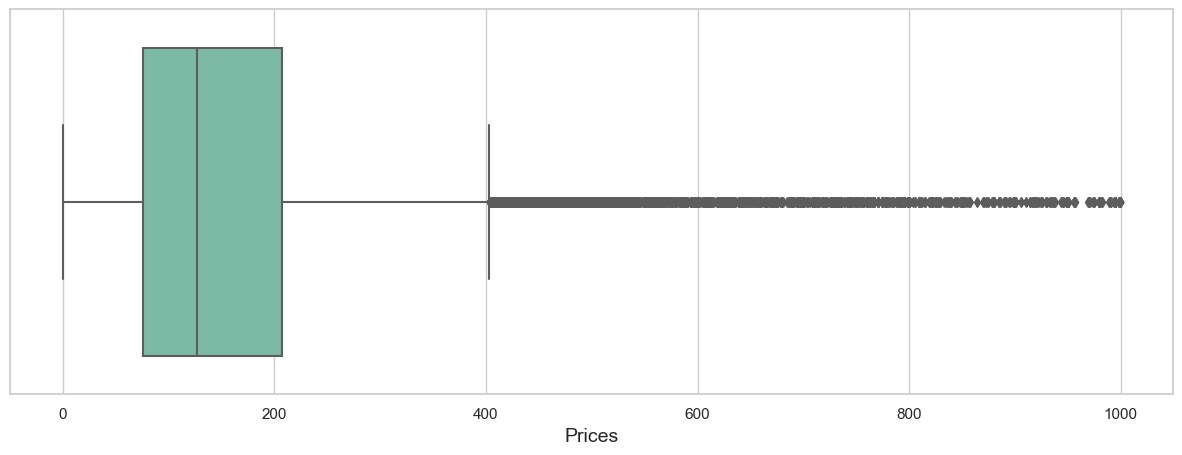

In [67]:
# Boxplot
plt.figure(figsize=(15, 5)) 
fig = sns.boxplot(x='price', data=listings, color = '#73C4A8') 
fig.set_xlabel('Prices', fontsize=14)
plt.show()

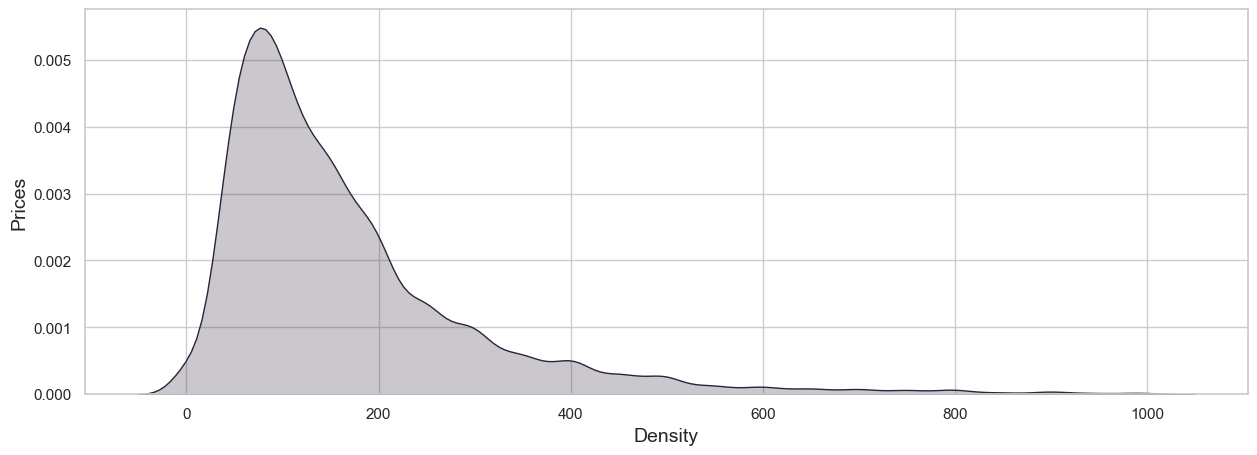

In [68]:
# Density plot
plt.figure(figsize=(15, 5))
ax = sns.kdeplot(data=listings, x='price', fill=True, color='#2D223A')
ax.set_xlabel('Density', fontsize=14)
ax.set_ylabel('Prices', fontsize=14)
plt.show()

In [69]:
# Display outliers using interquartile ranges

# function to see the number of outliers in our dataset according to interquartile ranges
def outliers (listings):
    for columnas in listings:
        if listings[columnas].dtype in ['int64', 'float64']:  # Comprueba si la columna es numérica

            Q1 = listings[columnas].quantile(0.25)
            Q3 = listings[columnas].quantile(0.75)
            IQR = Q3 - Q1
            outlierIzq = Q1-(1.5*IQR)
            outlierDer = Q3+(1.5*IQR)
            outliers = listings[columnas][(listings[columnas] < outlierIzq) | (listings[columnas] > outlierDer)]
            print("Variable " + columnas + " has " + str(len(outliers)) + " outliers")

    
outliers(listings)

Variable id has 7294 outliers
Variable host_id has 0 outliers
Variable latitude has 549 outliers
Variable longitude has 2997 outliers
Variable accommodates has 1333 outliers
Variable bedrooms has 9117 outliers
Variable beds has 2459 outliers
Variable minimum_nights has 868 outliers
Variable maximum_nights has 10 outliers
Variable availability_30 has 4189 outliers
Variable availability_60 has 0 outliers
Variable availability_90 has 0 outliers
Variable availability_365 has 0 outliers
Variable number_of_reviews has 5038 outliers
Variable number_of_reviews_ltm has 6080 outliers
Variable number_of_reviews_l30d has 4340 outliers
Variable review_scores_rating has 2996 outliers
Variable review_scores_accuracy has 3032 outliers
Variable review_scores_cleanliness has 3734 outliers
Variable review_scores_checkin has 3224 outliers
Variable review_scores_communication has 3331 outliers
Variable review_scores_location has 2564 outliers
Variable review_scores_value has 3660 outliers
Variable calculat

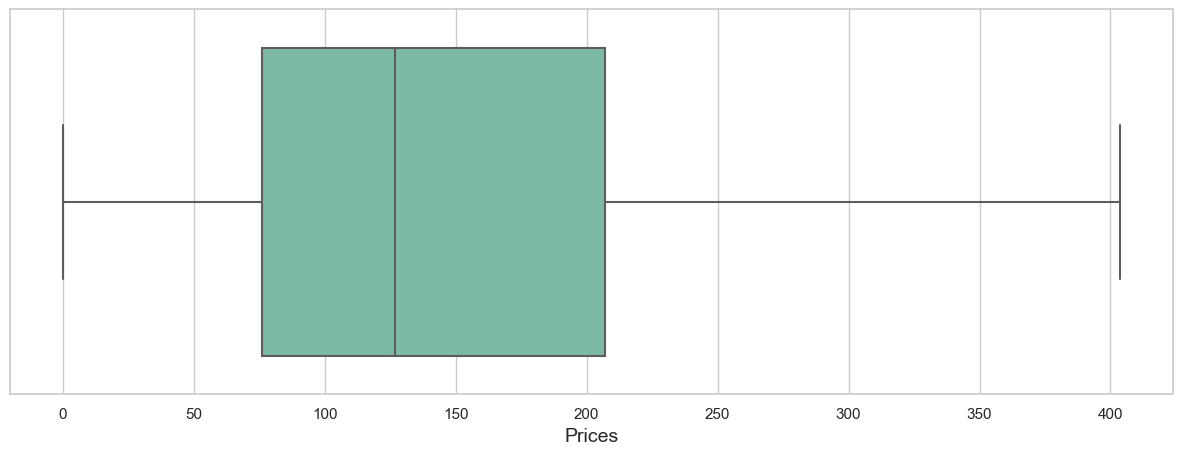

In [70]:
# Repair outliers using interquartile ranges

def reparar_atipicos(listings, col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    
    atipico_inf = Q1 - (1.5 * IQR)
    atipico_sup = Q3 + (1.5 * IQR)
    
    for indice in range(len(listings[col.name])): 
        if indice in listings.index:  
            elemento = listings.loc[indice, col.name] 
            if elemento > atipico_sup: 
                listings.loc[indice, col.name] = atipico_sup
            elif elemento < atipico_inf: 
                listings.loc[indice, col.name] = atipico_inf
            
    return listings  

# fix the outliers of the variable Price
reparar_atipicos(listings, listings['price'])

# boxplot
plt.figure(figsize=(15, 5))  
sns.set(style="whitegrid")  
fig = sns.boxplot(x="price", data=listings, color = '#73C4A8')  
fig.set_xlabel('Prices', fontsize=14)
plt.show()

In [74]:
# Save clean df to csv
# listings.to_csv('insideairbnb/airbnb_limpio.csv', index=False)

### Calendar & Reviews

#### Treatment of null values

In [75]:
# We see the null values of calendar dataset
print('En total hay', calendar.isnull().sum().sum(), 'valores nulos en el dataframe repartidos de la siguiente manera:')
calendar.isnull().sum()

En total hay 1416 valores nulos en el dataframe repartidos de la siguiente manera:


listing_id          0
date                0
available           0
price             342
adjusted_price    342
minimum_nights    366
maximum_nights    366
dtype: int64

In [76]:
# Drop the nrows with null values
calendar = calendar.dropna()

In [77]:
# Check the null of the dataframe again
calendar.isnull().sum().sum()

0

In [78]:
# We see the null values of reviews dataset
print('En total hay', reviews.isnull().sum().sum(), 'valores nulos en el dataframe repartidos de la siguiente manera:')
reviews.isnull().sum()

En total hay 212 valores nulos en el dataframe repartidos de la siguiente manera:


listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      5
comments         207
dtype: int64

In [79]:
# Drop the nrows with null values
reviews = reviews.dropna()

In [80]:
# Check the null of the dataframe again
reviews.isnull().sum().sum()

0

### Safety dataset

#### Column processing

In [81]:
# We will consider only some of the columns

# Distrito, fecha reportada de la agresión, gravedad de la agresión y la latitud y longitud
safety = safety[['BORO_NM', 'RPT_DT', 'LAW_CAT_CD', 'Latitude', 'Longitude', 'Lat_Lon']].sort_values(by='RPT_DT', ascending=False)

# Delete the null values and sort by date
safety = safety.dropna().sort_values(by='RPT_DT', ascending=False)

# Filter by severity (felony and violation)
safety = safety[safety['LAW_CAT_CD'] != 'MISDEMEANOR']

## Exploratory data analysis (EDA)

### Neighbourhood analysis

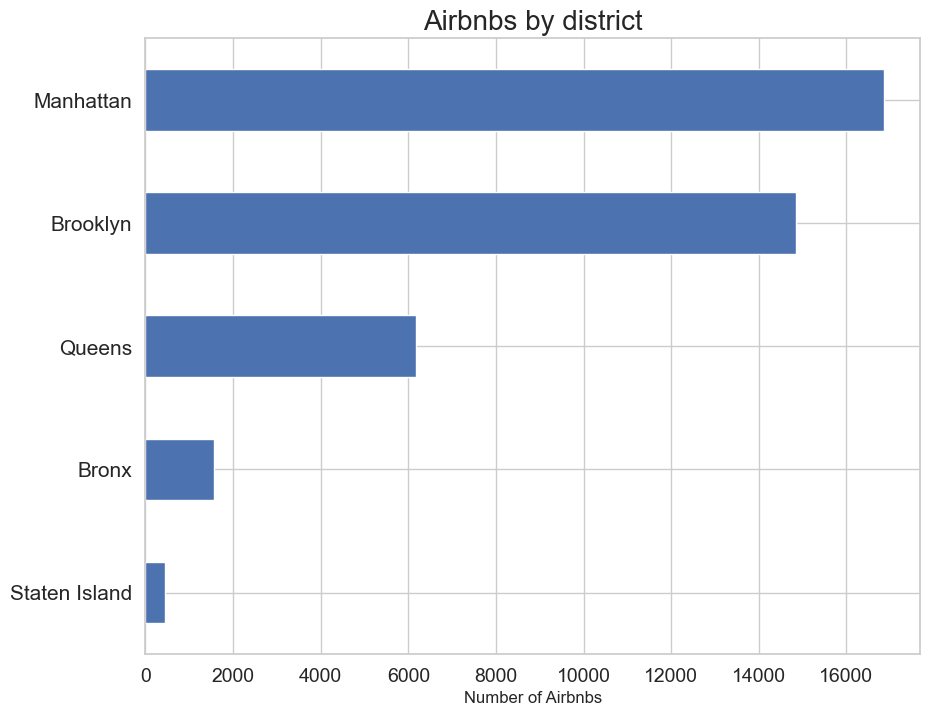

In [83]:
# We plot the districts with the most Airbnb listings in New York City
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=15)
freq_district = listings['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=True)
freq_district.plot.barh(figsize=(10, 8), color='b', width=0.5)
plt.title("Airbnbs by district", fontsize=20)
plt.xlabel('Number of Airbnbs', fontsize=12)
plt.show();

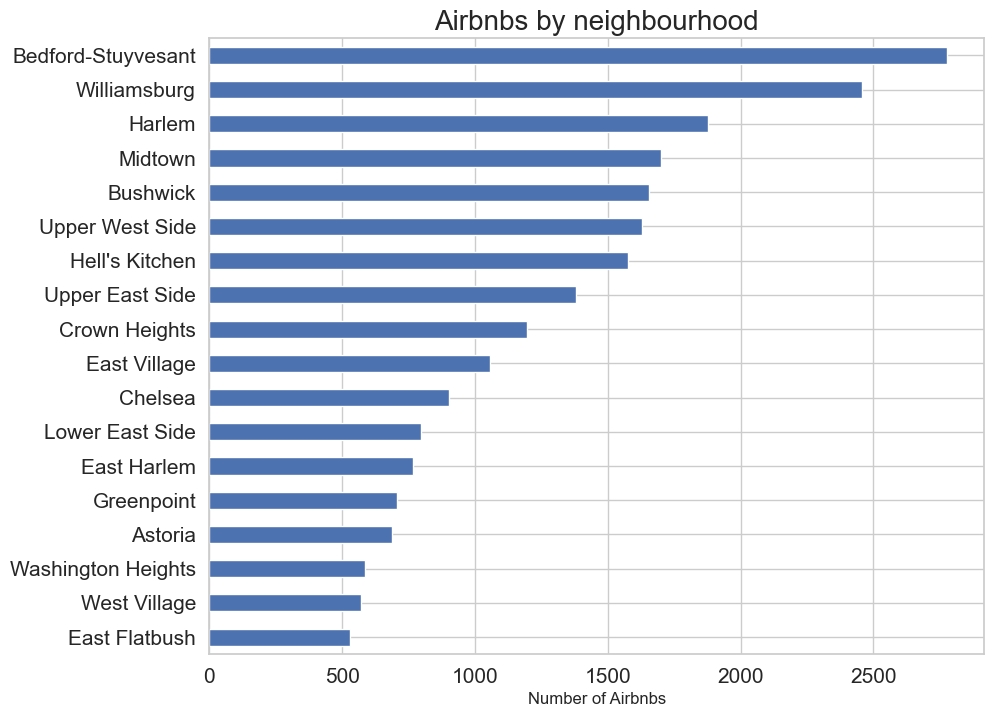

In [84]:
# Now we plot the neighbourhoods with the most Airbnb listings in New York City.
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
freq_neighbourhood = listings['neighbourhood_cleansed'].value_counts().sort_values(ascending=True)
freq_neighbourhood500 = freq_neighbourhood[freq_neighbourhood > 500]
freq_neighbourhood500.plot.barh(figsize=(10, 8), color='b', width=0.5)
plt.title("Airbnbs by neighbourhood", fontsize=20)
plt.xlabel('Number of Airbnbs', fontsize=12)
plt.show();

We can see that the majority of the Airbnbs are in ``Manhattan`` and ``Brooklyn``.

In [ ]:
# We create an interactive map of the Airbnb locations
# Expand the clusters to find the individual listings' locations.
lats = listings['latitude'].tolist()
lons = listings['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[40.7179540579022, -74.00057219119296], zoom_start=11)
FastMarkerCluster(data=locations).add_to(map1)
map1

We can confirm that the majority of the Airbnbs are in ``Manhattan`` and ``Brooklyn``.

### Room and property types

#### Room types

In [85]:
# We see the airbnbs room types in New York
listings['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

We have 4 types:
- Private room
- Entire apartment
- Hotel room
- Shared room

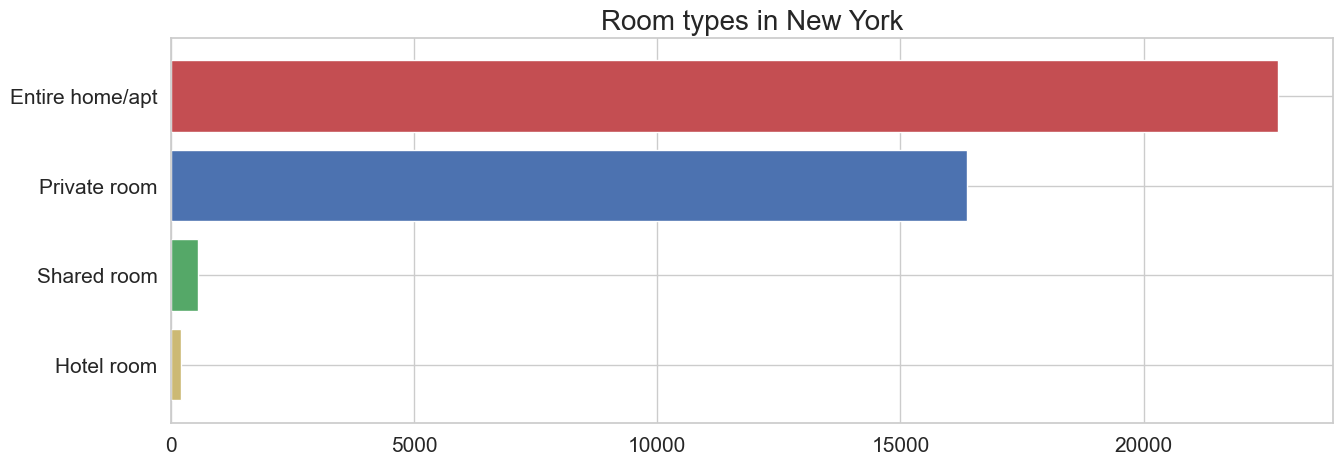

In [86]:
# We represent the room types according to their quantity
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
freq_roomtype = listings['room_type'].value_counts().sort_values(ascending=True)
freq_roomtype.plot.barh(figsize=(15, 5), width=0.8, color = ["y","g","b","r"])
plt.title('Room types in New York', fontsize=20)
plt.show()

We see that almost all Airbnbs in the city are ``entire apartments`` and ``private rooms``.

#### Property types

In [87]:
# We see the property types
listings['property_type'].unique()

array(['Private room in rental unit', 'Entire rental unit',
       'Entire townhouse', 'Room in boutique hotel',
       'Private room in bed and breakfast', 'Private room in townhouse',
       'Private room in home', 'Private room in condo',
       'Private room in loft', 'Entire guesthouse', 'Entire guest suite',
       'Entire loft', 'Private room in guest suite',
       'Entire serviced apartment', 'Entire condo', 'Entire home',
       'Shared room in loft', 'Shared room in rental unit',
       'Private room in houseboat', 'Shared room in home', 'Private room',
       'Entire place', 'Private room in guesthouse', 'Boat',
       'Room in aparthotel', 'Room in serviced apartment',
       'Private room in religious building', 'Entire cottage',
       'Private room in serviced apartment', 'Cave', 'Tiny home',
       'Entire bungalow', 'Shared room in condo', 'Floor',
       'Private room in hostel', 'Private room in casa particular',
       'Room in hotel', 'Shared room in townhouse',
 

There is a problem in this clasification so we will try to restructe the column `property_type`.

In [88]:
# Create a property type filter
freq_proptype = listings['property_type'].value_counts()
freq_proptype = freq_proptype[freq_proptype > 45]
freq_proptype

Entire rental unit                    16842
Private room in rental unit           10489
Private room in home                   2132
Entire condo                           1642
Entire home                            1476
Private room in townhouse              1065
Entire loft                             746
Room in hotel                           677
Entire townhouse                        659
Entire serviced apartment               614
Private room in condo                   598
Room in boutique hotel                  483
Shared room in rental unit              430
Entire guest suite                      391
Private room in serviced apartment      298
Private room in loft                    273
Private room in guest suite             130
Private room in casa particular          93
Entire place                             76
Entire guesthouse                        65
Room in aparthotel                       63
Private room in bed and breakfast        63
Private room                    

In [89]:
# We modify the property type values
list_proptype = freq_proptype.index.to_list()
dict_proptype = {list_proptype[0]:'Apartment',
    list_proptype[1]:'Apartment',
    list_proptype[2]:'House',
    list_proptype[3]:'Condominium',
    list_proptype[4]:'House',
    list_proptype[5]:'Townhouse',
    list_proptype[6]:'Loft',
    list_proptype[7]:'Hotel',
    list_proptype[8]:'Townhouse',
    list_proptype[9]:'Apartment',
    list_proptype[10]:'Condominium',
    list_proptype[11]:'Hotel',
    list_proptype[12]:'Apartment',
    list_proptype[13]:'Guest suite',
    list_proptype[14]:'Apartment',
    list_proptype[15]:'Loft',
    list_proptype[16]:'Guest suite',
    list_proptype[17]:'House',
    list_proptype[18]:'Apartment',
    list_proptype[19]:'House',
    list_proptype[20]:'Aparthotel',
    list_proptype[21]:'B&B',
    list_proptype[22]:'Apartment',
    list_proptype[23]:'House',
    list_proptype[24]:'House',}
listings = listings.replace({"property_type": dict_proptype})

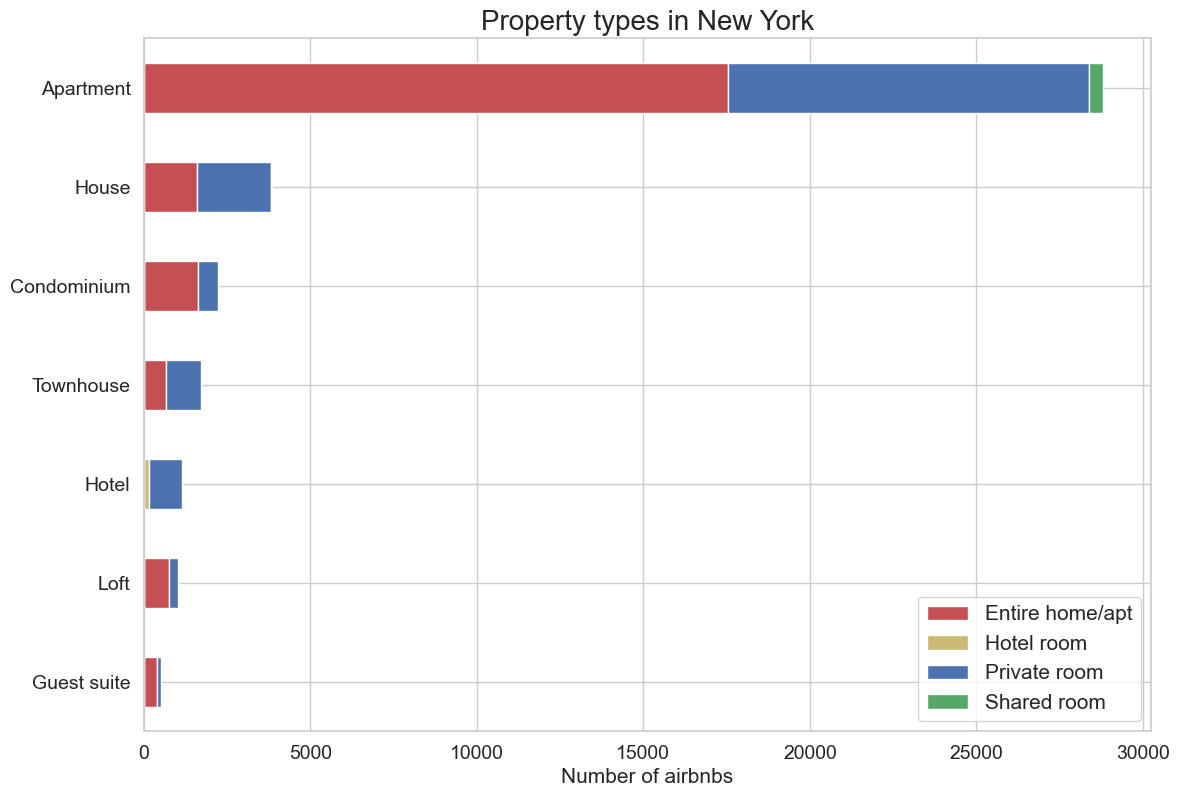

In [90]:
# We represent the types of Airbnbs according to their quantity
prop = listings.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:4].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
prop.plot(kind='barh',stacked=True, color = ["r","y","b","g"],
              linewidth = 1, grid=True, figsize=(13,9), width=0.5)
plt.title('Property types in New York', fontsize=20)
plt.xlabel('Number of airbnbs', fontsize=15)
plt.ylabel("")
plt.legend(loc = 4, prop = {"size" : 15})
plt.rc('ytick', labelsize=13)
plt.show()

We can see that the vast majority of Airbnbs in New York are ``apartments``, with a significant difference compared to the second category, which is ``houses``. 
</br> 
This makes sense since when you see the city buildings.

#### Number of guests

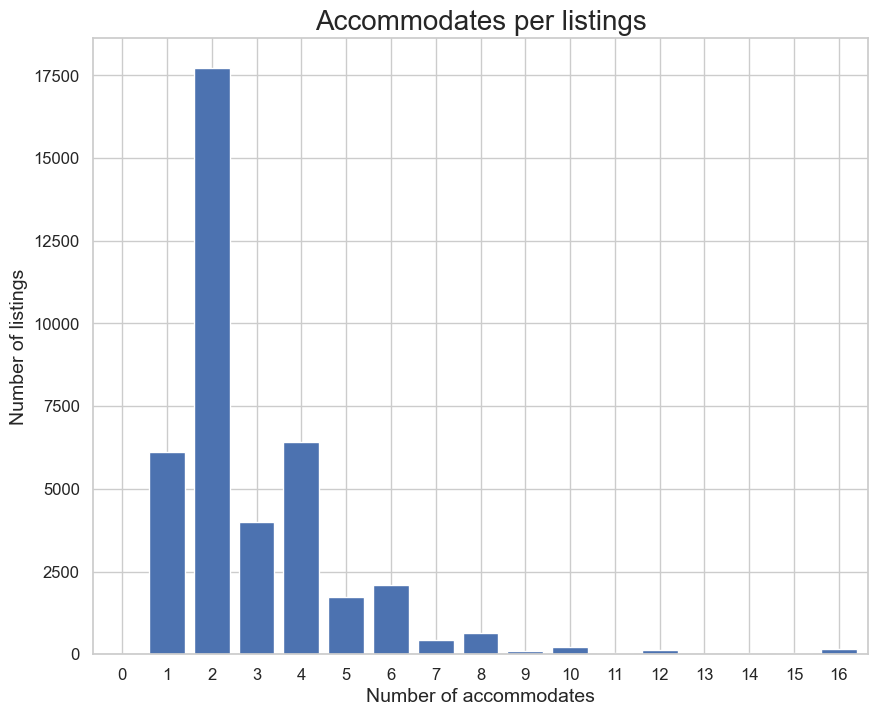

In [91]:
# We graph the number of Airbnbs according to their guests capacity
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
freq_persons = listings['accommodates'].value_counts().sort_index()
freq_persons.plot.bar(figsize=(10, 8), color='b', width=0.8, rot=0)
plt.title("Accommodates per listings", fontsize=20)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Number of accommodates', fontsize=14)
plt.show()

The majority of bookings are for ``1 to 4 people``, with ``2 people`` standing out with a significant advantage.

### Average prices

#### Average price per district

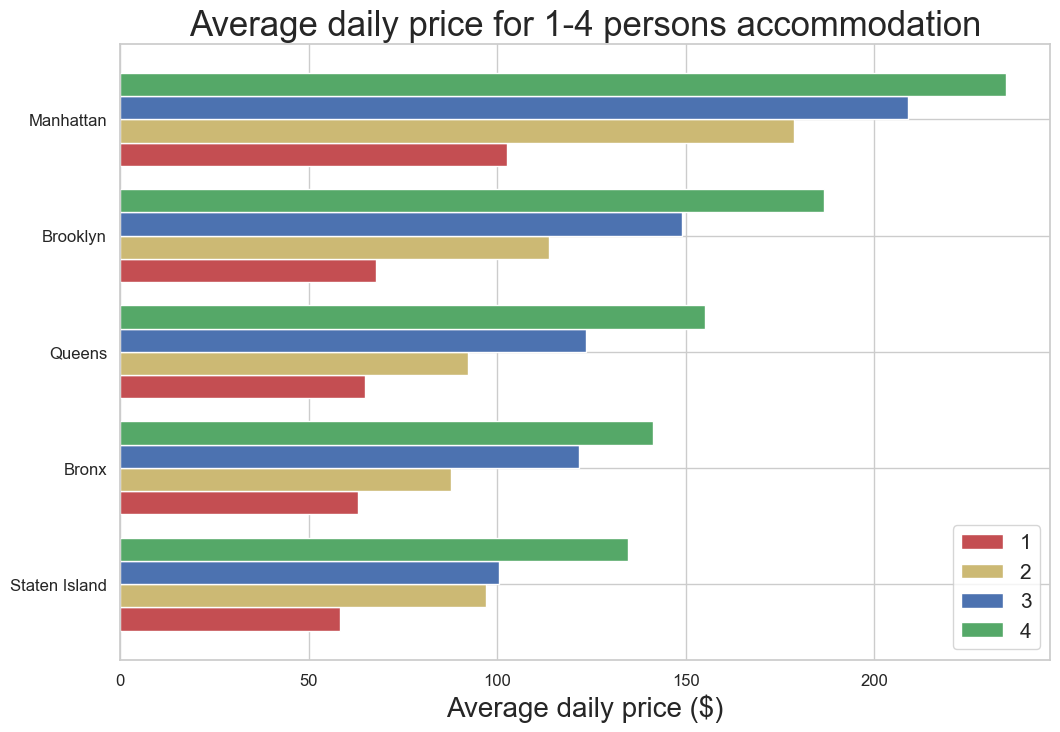

In [92]:
# We plot the average price per district and number of guests
turists = listings[(listings['accommodates'] <= 4) & (listings['accommodates'] > 0)] 
price_mean = turists.groupby(['neighbourhood_group_cleansed', 'accommodates'])['price'].mean()
price_mean.sort_values(ascending=False)
price_mean = price_mean.unstack()
price_mean['total'] = price_mean.iloc[:,0:4].sum(axis = 1)
price_mean = price_mean.sort_values(by=['total'])
price_mean = price_mean.drop(columns=['total'])

price_mean.plot(kind='barh', stacked=False, color = ["r","y","b","g"],
              linewidth=1, grid=True, figsize=(12,8), width=0.8)
plt.title('Average daily price for 1-4 persons accommodation', fontsize=25)
plt.xlabel('Average daily price ($)', fontsize=20)
plt.ylabel("")
plt.legend(loc = 4, prop = {"size" : 15})
plt.rc('ytick', labelsize=13)
plt.show()

We see that the district with the highest average price for Airbnbs in New York is ``Manhattan`` for 1, 2, 3, and 4 guests and it is followed by ``Brooklyn`` in second place. </br>
</br>
The price of Airbnb in Staten Island is half the price of Brooklyn.

#### Average price per neighborhood

In [93]:
# Select 1, 2, 3 or 4
select_people = listings[listings['accommodates'] == 2] 

In [96]:
# We create an interactive map of the average Airbnb prices by neighborhood

# Import the dataframe to plot the map
adam = gpd.read_file("insideairbnb/neighbourhoods.geojson")

feq1 = select_people.groupby(['neighbourhood_cleansed'])['price'].mean()
feq1 = feq1.sort_values(ascending=False)
feq1 = feq1.to_frame().reset_index()
feq1 = feq1.rename(columns = {"neighbourhood_cleansed":"neighbourhood", "price":"average_price"})
adam = pd.merge(adam, feq1, on='neighbourhood', how='left')
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)
adam = adam.dropna()

map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['green','yellow','orange','red','brown'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map1 = folium.Map(location=[40.7179540579022, -74.00057219119296], zoom_start=11)
folium.GeoJson(data=adam,
               name='New york',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map1)

map1

We see that the highest concentration of the highest average daily prices for Airbnb is in tourist zone, ``Manhattan`` and in the ``Brooklyn`` area that is close to the center.

### Neighbourhood safety

In [100]:
# We create an interactive map of the crime count by neighborhood
lats_s = safety['Latitude'].tolist()
lons_s = safety['Longitude'].tolist()
locations_s = list(zip(lats_s, lons_s))

map2 = folium.Map(location_s=[40.7179540579022, -74.00057219119296], zoom_start=10)
FastMarkerCluster(data=locations_s).add_to(map2)
map2

In [101]:
# We filter coordinates for the top 10 neighborhoods with the most reports in New York
crimes_coord = safety.groupby('Lat_Lon').count().sort_values(by='BORO_NM', ascending=False).reset_index().iloc[:,:2]
crimes_coord['Lat_Lon'] = crimes_coord['Lat_Lon'].str.replace(')','').str.replace('(','').to_frame()
crimes_coord = crimes_coord[crimes_coord['BORO_NM'] > 720]
crimes_coord[['latitude', 'longitude']] = crimes_coord['Lat_Lon'].str.split(",", expand = True)

In [102]:
# Import Geopy
import geopy
from geopy.geocoders import Nominatim

# We create a function to get the coordinates of the addresses with the most reports in the city,
def get_address2(data):
    address2 = []
    geolocator = Nominatim(user_agent="ny")
    for i in range(len(data)):
        lat = data.iloc[i]['latitude']
        lon = data.iloc[i]['longitude']
        try:
            location = geolocator.reverse(str(lat)+","+str(lon))
            address2.append(location.address)
        except:
            address2.append(0)
            pass
    
    data['address'] = address2

    return(data[['BORO_NM','address']])

# Apply the function
crimes_coord = get_address2(crimes_coord)

In [103]:
# We display the Top 10 of the main addresses with the most reports in the city
for i in range(10):
    print('NUMERO '+str(i+1),'-',crimes_coord.address[i])
    print(crimes_coord.BORO_NM[i], 'crímenes')
    print('')

NUMERO 1 - NYPD - 75th Precinct, 1000, Sutter Avenue, East New York, Brooklyn, Kings County, City of New York, New York, 11208, United States
1275 crímenes

NUMERO 2 - 2, East 169th Street, High Bridge, Bronx County, The Bronx, City of New York, New York, 10452, United States
1210 crímenes

NUMERO 3 - 261, Alexander Avenue, Mott Haven, Bronx County, The Bronx, City of New York, New York, 10454, United States
943 crímenes

NUMERO 4 - 900, Fteley Avenue, Bronx County, The Bronx, City of New York, New York, 10473, United States
897 crímenes

NUMERO 5 - 4111, Laconia Avenue, Bronx County, The Bronx, City of New York, New York, 10466, United States
803 crímenes

NUMERO 6 - NYPD - 73rd Precinct, 1470, East New York Avenue, Ocean Hill, Brooklyn, Kings County, City of New York, New York, 11212, United States
764 crímenes

NUMERO 7 - Webster Avenue, Bedford Park, Bronx County, The Bronx, City of New York, New York, 10467, United States
754 crímenes

NUMERO 8 - 2108, Ryer Avenue, Fordham, Bronx 

Now we see that the district with most of the reports according to their streets is the ``Bronx`` and it is followed by ``Brooklyn``. </br>
We also see that ``Manhattan`` doesn't have as much prominence as before.
This aligns more with the reality.

### Reviews, ratings, and host responses

#### Neighborhoods with higher scores

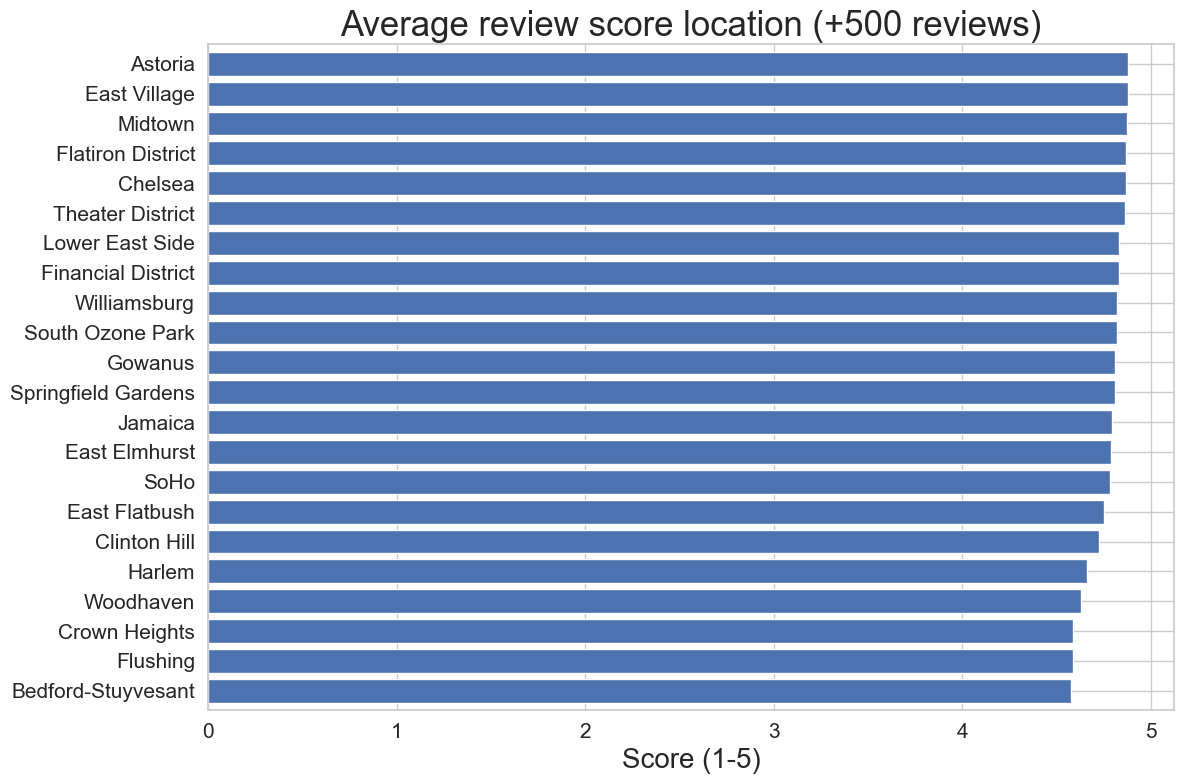

In [104]:
# We display the neighborhoods with the highest average rating in the entire city
fig = plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

feq2 = listings[listings['number_of_reviews']>=500]
feq2 = feq2.groupby('neighbourhood_cleansed')['review_scores_location'].mean().sort_values(ascending=True)
feq2.plot.barh(color='b', width=0.8)
plt.title("Average review score location (+500 reviews)", fontsize=25)
plt.xlabel('Score (1-5)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

In [107]:
# We display the neighborhoods with their respective average ratings on an interactive map
feq3 = listings.groupby('neighbourhood_cleansed')['review_scores_location'].mean().sort_values(ascending=True)
feq3 = feq3.to_frame().reset_index()
feq3 = feq3.rename(columns = {"neighbourhood_cleansed":"neighbourhood", "review_scores_location":"average_review"})
adam2 = pd.merge(adam, feq3, on='neighbourhood', how='left')
adam2 = adam2.dropna()

map3_dict = adam2.set_index('neighbourhood')['average_review'].to_dict()
color_scale = LinearColormap(['red','orange','yellow','green'], vmin = min(map3_dict.values()), vmax = max(map3_dict.values()))

def get_color(feature):
    value = map3_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[40.7179540579022, -74.00057219119296], zoom_start=11)
folium.GeoJson(data=adam2,
               name='New york',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_review'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)

map3

#### Super Host

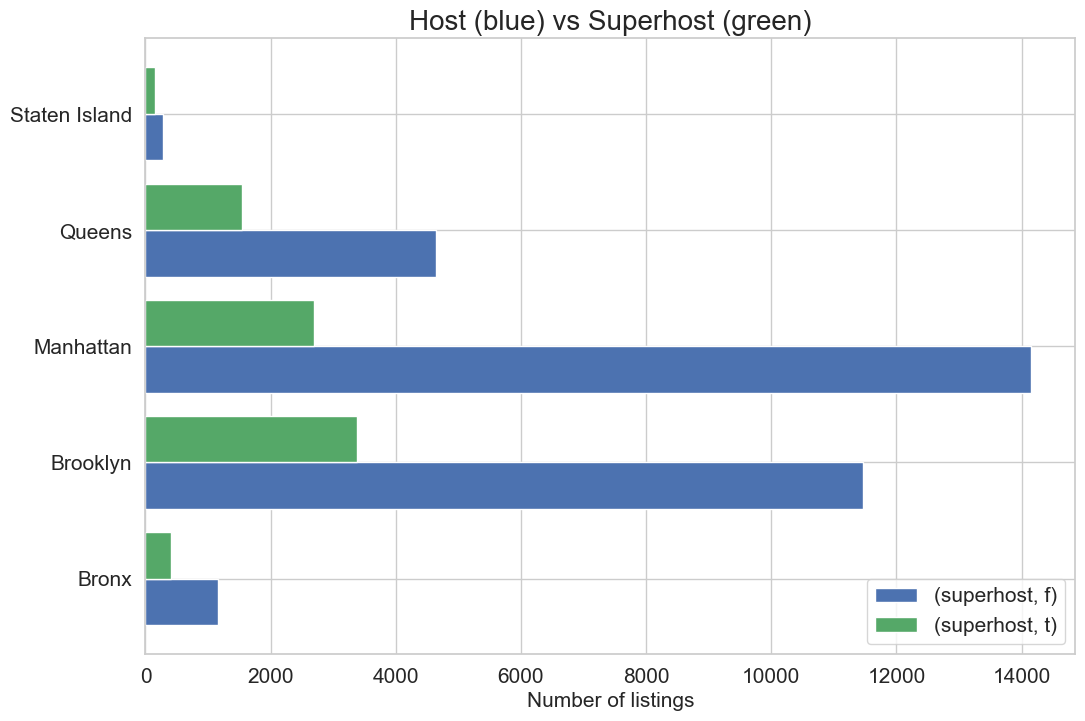

In [108]:
# We represent the number of regular hosts and superhosts in each district of the city
sh = listings.groupby(['neighbourhood_group_cleansed', 'host_is_superhost']).count()
sh = sh.iloc[:,:1]
sh = sh.unstack().reset_index()
sh = sh.set_index('neighbourhood_group_cleansed')
sh = sh.rename(columns = {"id":"superhost"})

sh.plot(kind='barh', stacked=False, color = ["b","g"],
              linewidth=1, grid=True, figsize=(12,8), width=0.8)
plt.title('Host (blue) vs Superhost (green)', fontsize=20)
plt.xlabel('Number of listings', fontsize=15)
plt.ylabel("")
plt.legend(loc = 4, prop = {"size" : 15})
plt.rc('ytick', labelsize=13)
plt.show()

We know that in ``Manhattan`` there are more Airbnbs, but we see that most of the superhosts are in ``Brooklyn``. </br>
On the other hand, we can see that in ``Island`` half of the hosts are superhosts.

In [115]:
# Pie chart
colors = ['#16A085', '#922B21']
fig = px.pie(values = listings['host_is_superhost'].value_counts(), names=['No superhost','SUPERHOST'], color_discrete_sequence=colors, hole=0.3)
fig.update_layout(width=600, height=500, showlegend=True,  title_x=0.5, template = 'plotly_white',legend=dict(
        orientation='h',  # Horizontal orientation
        y=-0.05,   # Vertical offset from the graph (0-1)
        xanchor='center',  # Ancla en el centro horizontal
        x=0.5   # Horizontal offset from the graph (0-1)
    ))
fig.update_traces(textinfo='percent',textfont_size=16)
fig.update_traces(marker = dict(line = dict(color = 'black', width = 0.5)))

fig.show()

#### Host responses

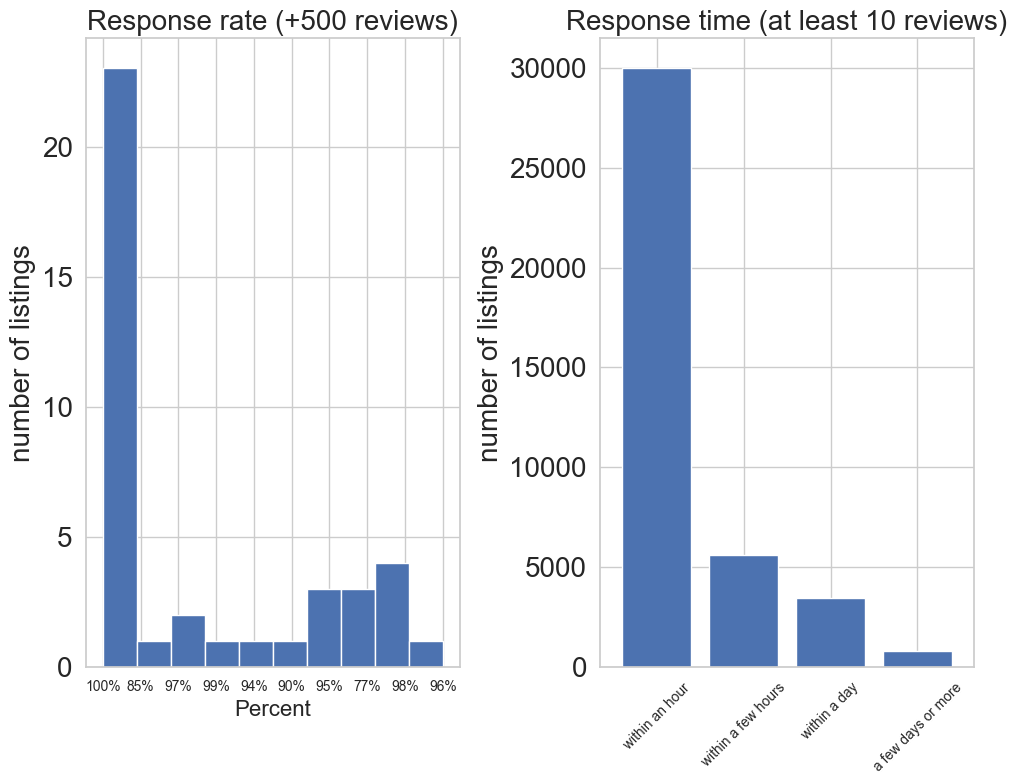

In [109]:
# We graph the percentage and response time of the hosts
fig = plt.figure(figsize=(10,8))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq4 = listings[listings['number_of_reviews']>500]
feq4 = feq4['host_response_rate'].dropna()
ax1 = plt.hist(feq4)
plt.title("Response rate (+500 reviews)", fontsize=20)
plt.ylabel("number of listings", fontsize=20)
plt.xlabel("Percent", fontsize=16)

ax2 = fig.add_subplot(122)
feq5 = listings['host_response_time'].value_counts()
ax2 = feq5.plot.bar(color='b', width=0.8, rot=45)
plt.title("Response time (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings", fontsize=20)

plt.tight_layout()
plt.show()

We see that the majority of hosts have a 100% response rate and they answer in less than an hour.

### Availability over time

In [110]:
calendar.price = calendar.price.str.replace(",","")
calendar['price'] = pd.to_numeric(calendar['price'].str.strip('$'))
calendar = calendar[calendar.date < '2022-12-10']

In [111]:
listings.index.name = "listing_id"
calendar = pd.merge(calendar, listings[['accommodates']], on = "listing_id", how = "left")

In [112]:
# We convert 'date' to a datetime variable
calendar['date'] = pd.to_datetime(calendar['date'])

In [113]:
# We graph the number of Airbnb availabilities in the city
sum_available = calendar[calendar.available == "t"].groupby(['date']).size().to_frame(name= 'available').reset_index()
sum_available['weekday'] = sum_available['date'].dt.day_name()
sum_available = sum_available.set_index('date')

sum_available.iplot(y='available', mode = 'lines', xTitle = 'Date', yTitle = 'number of listings available',\
                   text='weekday', title = 'Number of listings available by date')

We can see how in September, people travel more to New York than in late autumn, coinciding with the holiday period.

In [114]:
# We graph the average price of Airbnb in the same period
average_price = calendar[(calendar.available == "t") & (calendar.accommodates == 2)].groupby(['date']).mean().astype(np.int64).reset_index()
average_price['weekday'] = average_price['date'].dt.day_name()
average_price = average_price.set_index('date')

average_price.iplot(y='price', mode='lines', xTitle='Date', yTitle='Price',
    text='weekday', title='Average price of available 2 persons accommodation by date')

It coincides that in September, lower availability corresponds to higher prices.